In [1]:
import copy

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

from pysisyphus.AnimPlot import AnimPlot
from pysisyphus.cos.NEB import NEB
from pysisyphus.cos.SimpleZTS import SimpleZTS
from pysisyphus.Geometry import Geometry
from pysisyphus.optimizers.SteepestDescent import SteepestDescent
from pysisyphus.optimizers.ConjugateGradient import ConjugateGradient
from pysisyphus.optimizers.BFGS import BFGS

# Analytical Potentials
* Automatic differentiation with sympy
* Gradient and Hessian

## Anapot

\begin{equation}
V(x,y) = 4 + 4.5x - 4y + x^2 + 2y^2-2xy + x^4 - 2x^2y
\end{equation}

* Two minima
* One saddle point

In [2]:
from pysisyphus.calculators.AnaPot import AnaPot

KWARGS = {
    "images": 5,
    "dump": False,
}

def get_geoms(coords=None):
    if coords is None:
        initial = np.array((-1.05274, 1.02776, 0))
        final = np.array((1.94101, 3.85427, 0))
        coords = (initial, final)
    atoms = ("H")
    geoms = [Geometry(atoms, c) for c in coords]
    return geoms


def run_cos_opt(cos, Opt, images, **kwargs):
    cos.interpolate(images)
    opt = Opt(cos, **kwargs)
    for img in cos.images:
        img.set_calculator(AnaPot())
    opt.run()

    return opt


def animate(opt):
    xlim = (-2, 2.5)
    ylim = (0, 5)
    levels = (-3, 4, 80)
    ap = AnimPlot(AnaPot(), opt, xlim=xlim, ylim=ylim, levels=levels)
    ap.animate()

# Nudged Elastic Band

## Steepest Descent

Path with 7 moving images.
Spent 0.0 s preparing the first cycle.
cycle   max(force)    rms(force)     max(step)     rms(step)       s/cycle
    1     5.319611     2.583329     0.040000     0.019425          0.0
    2     4.810052     2.400231     0.040000     0.019960          0.0
    3     4.297859     2.207344     0.040000     0.020544          0.0
    4     3.789431     2.005903     0.040000     0.021173          0.0
    5     3.289067     1.797794     0.040000     0.021863          0.0
    6     2.798195     1.585532     0.040000     0.022664          0.0
    7     2.314687     1.372019     0.040000     0.023708          0.0
    8     1.832452     1.160013     0.040000     0.025318          0.0
    9     1.341415     0.951461     0.040000     0.028366          0.0
   10     0.941540     0.750252     0.040000     0.031861          0.0
   11     0.698424     0.560788     0.040000     0.032118          0.0
   12     0.520667     0.396985     0.040000     0.030505          0.0
   13  

<IPython.core.display.Javascript object>


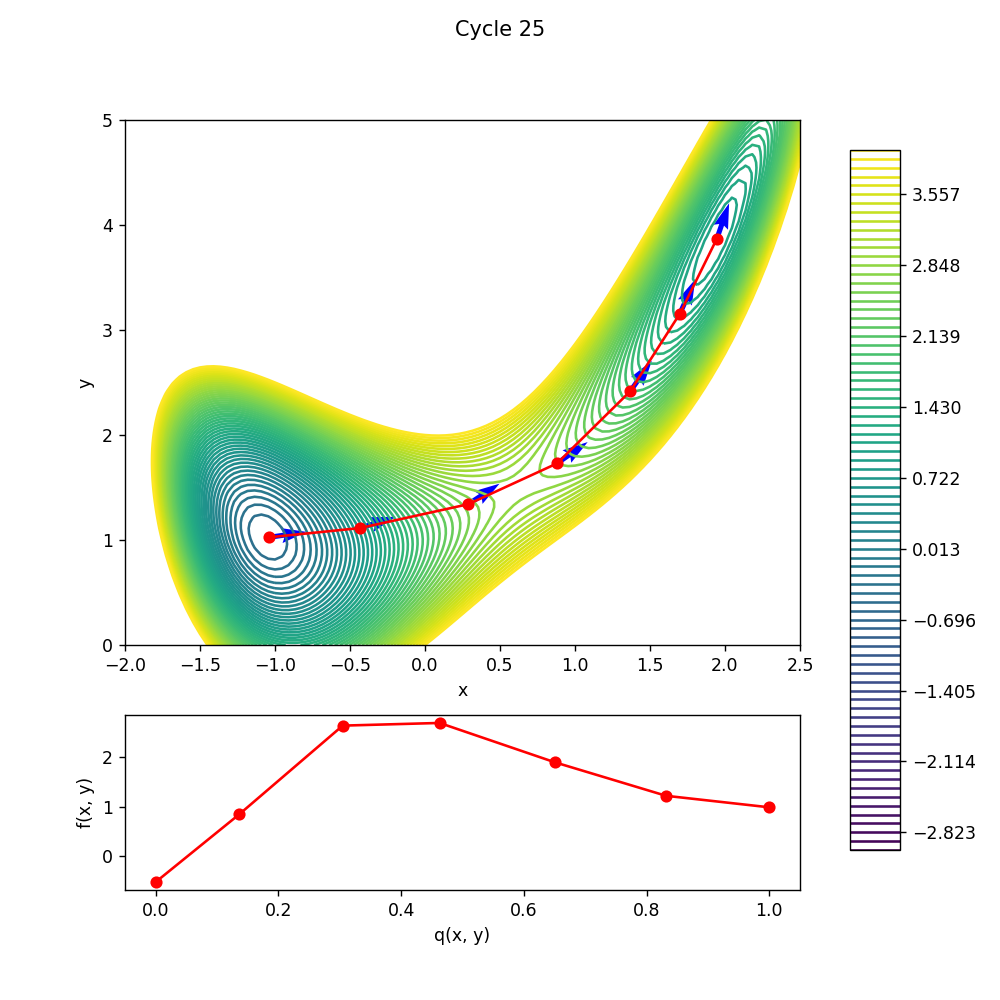

In [3]:
def test_steepest_descent_neb():
    kwargs = copy.copy(KWARGS)
    neb = NEB(get_geoms())
    opt = run_cos_opt(neb, SteepestDescent, **kwargs)

    assert(opt.is_converged)
    assert(opt.cur_cycle == 27) # k = 0.01

    return opt

opt = test_steepest_descent_neb()
animate(opt)

## Conjugate Gradient

In [ ]:
def test_cg_neb():
    kwargs = copy.copy(KWARGS)
    kwargs["max_cycles"] = 35
    neb = NEB(get_geoms())
    opt = run_cos_opt(neb, ConjugateGradient, **kwargs)

    assert(opt.is_converged)
    assert(opt.cur_cycle == 35) # k = 0.01

    return opt

opt = test_cg_neb()
animate(opt)

## BFGS

In [ ]:
def test_bfgs_neb():
    kwargs = copy.copy(KWARGS)
    neb = NEB(get_geoms())
    opt = run_cos_opt(neb, BFGS, **kwargs)

    assert(opt.is_converged)
    assert(opt.cur_cycle == 29) # k = 0.01

    return opt

opt = test_bfgs_neb()
animate(opt)

# Simple Zero Temperature String

## Equally spaced images

Path with 12 moving images.
Spent 0.0 s preparing the first cycle.
cycle   max(force)    rms(force)     max(step)     rms(step)       s/cycle
    1     5.356133     2.677505     0.040000     0.016164          0.0
    2     5.011509     2.547561     0.040000     0.016203          0.0
    3     4.669948     2.414234     0.040000     0.016297          0.0
    4     4.330303     2.278206     0.040000     0.016461          0.0
    5     3.991010     2.139948     0.040000     0.016717          0.0
    6     3.669959     1.999793     0.040000     0.017035          0.0
    7     3.371497     1.858483     0.040000     0.016906          0.0
    8     3.082754     1.721127     0.040000     0.016880          0.0
    9     2.802203     1.587998     0.040000     0.016973          0.0
   10     2.528116     1.459219     0.040000     0.017210          0.0
   11     2.258611     1.334776     0.040000     0.017624          0.0
   12     1.991700     1.214536     0.040000     0.018267          0.0
   13 

<IPython.core.display.Javascript object>


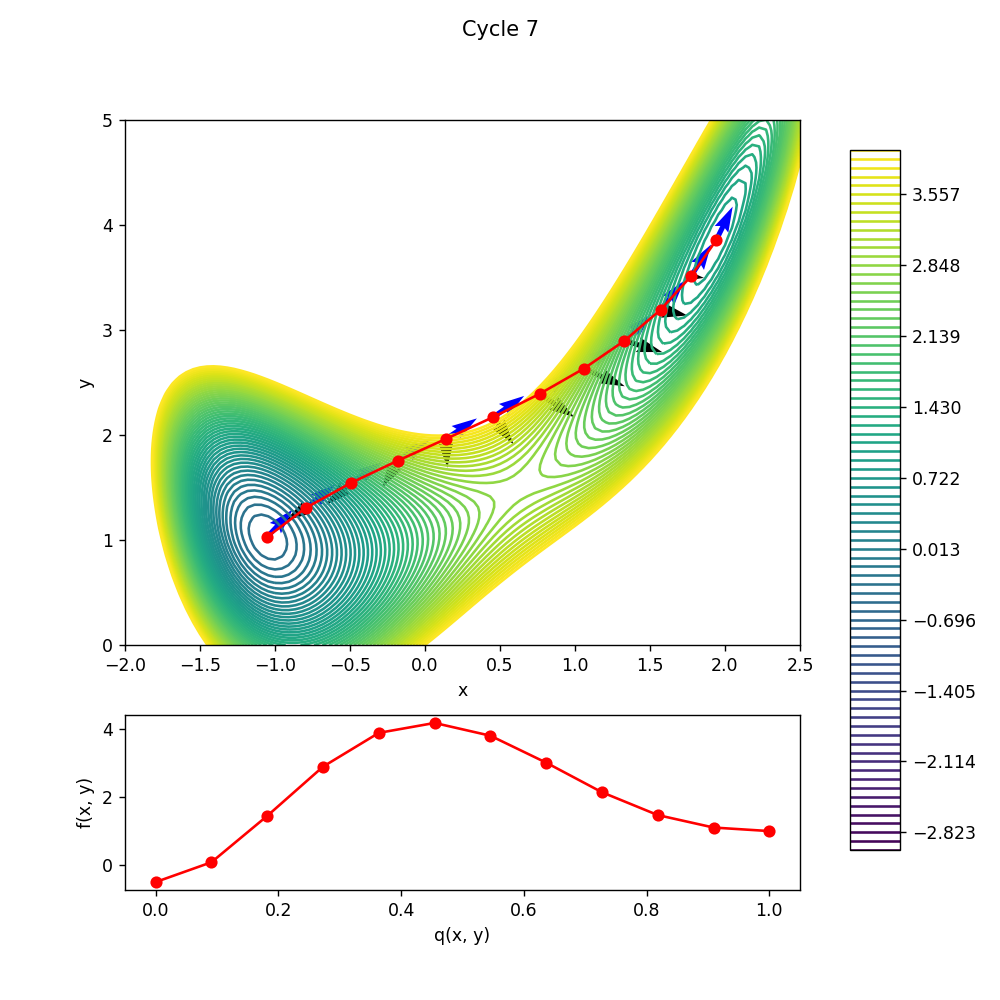

In [4]:
def test_equal_szts_more_images():
    kwargs = copy.copy(KWARGS)
    kwargs["images"] = 10
    convergence = {
        "max_force_thresh": 0.1,
    }
    kwargs["convergence"] = convergence
    szts_equal = SimpleZTS(get_geoms(), param="equal")
    opt = run_cos_opt(szts_equal, SteepestDescent, **kwargs)

    assert(opt.is_converged)
    assert(opt.cur_cycle == 28) # k = 0.01

    return opt

opt = test_equal_szts_more_images()
animate(opt)

## Higher resolution around the TS

Path with 12 moving images.
Spent 0.0 s preparing the first cycle.
cycle   max(force)    rms(force)     max(step)     rms(step)       s/cycle
    1     5.356133     2.677505     0.040000     0.016164          0.0
    2     5.050755     2.806175     0.040000     0.017570          0.0
    3     4.717866     2.649667     0.040000     0.017512          0.0
    4     4.390781     2.503253     0.040000     0.017522          0.0
    5     4.069058     2.352421     0.040000     0.017559          0.0
    6     3.752669     2.205300     0.040000     0.017662          0.0
    7     3.440549     2.057912     0.040000     0.017836          0.0
    8     3.131041     1.913312     0.040000     0.018125          0.0
    9     2.821997     1.770039     0.040000     0.018235          0.0
   10     2.548134     1.631724     0.040000     0.018199          0.0
   11     2.299092     1.499540     0.040000     0.018275          0.0
   12     2.058283     1.373765     0.040000     0.018494          0.0
   13 

<IPython.core.display.Javascript object>


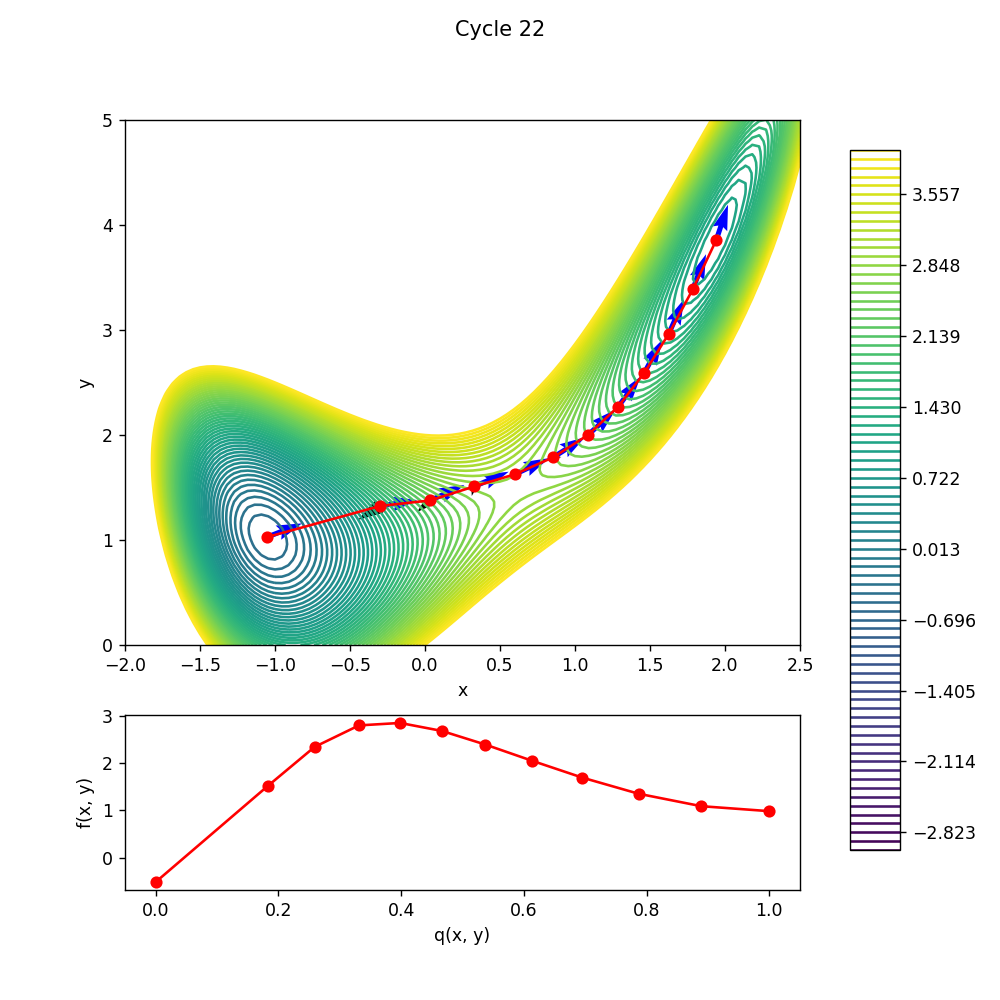

In [5]:
def test_energy_szts_more_images():
    kwargs = copy.copy(KWARGS)
    kwargs["images"] = 10
    convergence = {
        "max_force_thresh": 0.1,
    }
    kwargs["convergence"] = convergence
    szts_energy = SimpleZTS(get_geoms(), param="energy")
    opt = run_cos_opt(szts_energy, SteepestDescent, **kwargs)

    assert(opt.is_converged)
    assert(opt.cur_cycle == 28) # k = 0.01

    return opt

opt = test_energy_szts_more_images()
animate(opt)

# Müller-Brown-Potential

* Linear combination of four Gaussians
* Model surface often used for benchmarking IRC algorithms
* Three minima, two saddle points

\begin{align}
 A  &= (-200, -100, -170, 15) \\
 x_0 &= (1.0, 0.0, -0.5, -1.0) \\
 y_0 &= (0.0, 0.5, 1.5, 1.0) \\
 a  &= (-1.0, -1.0, -6.5, 0.7) \\
 b  &= (0.0, 0.0, 11.0, 0.6) \\
 c  &= (-10.0, -10.0, -6.5, 0.7)
\end{align}

\begin{equation}
 V(x,y) = \sum_i^4 A_i \exp \left (a_i(x-x_{0,i})^2 + b_i(x-x_{0,i})(y-y_{0,i}) + c_i(y-y_{0,i})^2 \right )
\end{equation}

In [ ]:
from pysisyphus.calculators.MullerBrownPot import MullerBrownPot

KWARGS = {
    "images": 4,
    "max_cycles": 100,
    "max_step": 0.02,
    "convergence": {
        "max_force_thresh": 1.3,
        "rms_force_thresh": 0.3,
        "max_step_thresh": 5e-4,
        "rms_step_thresh": 2e-4,
    },
    "dump": False,
}


def get_geoms(coords=None):
    if coords is None:
        min_a = np.array((-0.558, 1.442, 0)) # Minimum A
        min_b = np.array((0.6215, 0.02838, 0)) # Minimum B
        min_c = np.array((-0.05, 0.467, 0)) # Minimum C
        saddle_a = np.array((-0.822, 0.624, 0)) # Saddle point A
        coords = (min_b, min_c, saddle_a, min_a)
    atoms = ("H")
    geoms = [Geometry(atoms, c) for c in coords]
    return geoms


def run_cos_opt(cos, Opt, images, **kwargs):
    cos.interpolate(images)
    opt = Opt(cos, **kwargs)
    for img in cos.images:
        img.set_calculator(MullerBrownPot())
    opt.run()

    return opt


def animate(opt):
    xlim = (-1.75, 1.25)
    ylim = (-0.5, 2.25)
    levels=(-150, -15, 40)
    ap = AnimPlot(MullerBrownPot(), opt, xlim=xlim, ylim=ylim, levels=levels)
    ap.animate()

## Steepest Descent

In [ ]:
def test_steepest_descent_neb():
    kwargs = copy.copy(KWARGS)
    neb = NEB(get_geoms())
    opt = run_cos_opt(neb, SteepestDescent, **kwargs)

    assert(opt.is_converged)
    assert(opt.cur_cycle == 26)

    return opt

opt = test_steepest_descent_neb()
animate(opt)

## BFGS

In [ ]:
def test_bfgs_neb():
    kwargs = copy.copy(KWARGS)
    neb = NEB(get_geoms())
    opt = run_cos_opt(neb, BFGS, **kwargs)

    assert(opt.is_converged)
    assert(opt.cur_cycle == 14)

    return opt

opt = test_bfgs_neb()
animate(opt)

In [ ]:
def test_equal_szts():
    kwargs = copy.copy(KWARGS)
    convergence = {
        "rms_force_thresh": 2.4,
    }
    kwargs["convergence"] = convergence
    szts_equal = SimpleZTS(get_geoms(), param="equal")
    opt = run_cos_opt(szts_equal, SteepestDescent, **kwargs)

    assert(opt.is_converged)
    assert(opt.cur_cycle == 18)

    return opt

opt = test_equal_szts()
animate(opt)

In [ ]:
def test_equal_szts_straight():
    coords = np.array(((0, -0.25, 0), (0, 1.5, 0)))
    kwargs = copy.copy(KWARGS)
    kwargs["images"] = 10
    kwargs["max_step"] = 0.04
    convergence = {
        "rms_force_thresh": 2.4,
    }
    kwargs["convergence"] = convergence
    szts_equal = SimpleZTS(get_geoms(coords), param="equal")
    opt = run_cos_opt(szts_equal, SteepestDescent, **kwargs)

    return opt

opt = test_equal_szts_straight()
animate(opt)

# Symmetric Potential

\begin{equation}
 V(x,y) = (1 - x^2 - y^2)^2 + (y^2) / (x^2 + y^2)
\end{equation}

In [5]:
from pysisyphus.calculators.AnaPot3 import AnaPot3

KWARGS = {
    "images": 10,
    "max_cycles": 50,
    "convergence": {
        "max_force_thresh": 1.9e-2,
        "rms_force_thresh": 9.e-3,
        "max_step_thresh": 1.0e-2,
        "rms_step_thresh": 4e-3,
    },
    "dump": False,
}


def get_geoms():
    initial = np.array((-0.5, 0.5, 0))
    final = np.array((0.5, 0.5, 0))
    coords = (initial, final)
    atoms = ("H")
    geoms = [Geometry(atoms, c) for c in coords]
    return geoms


def run_cos_opt(cos, Opt, images, **kwargs):
    cos.interpolate(images)
    opt = Opt(cos, **kwargs)
    for img in cos.images:
        img.set_calculator(AnaPot3())
    opt.run()

    return opt


def animate(opt):
    xlim = (-1.5, 1.5)
    ylim = (-0.5, 1.5)
    levels = (-.5, 2, 30)
    interval = 250
    ap = AnimPlot(
            AnaPot3(), opt, xlim=xlim, ylim=ylim,
            levels=levels, interval=interval
    )
    ap.animate()

# NEB failure
* gradient gets projected out completely

In [ ]:
def test_steepest_descent_neb():
    kwargs = copy.copy(KWARGS)
    neb = NEB(get_geoms())
    opt = run_cos_opt(neb, SteepestDescent, **kwargs)

    assert(opt.is_converged)
    assert(opt.cur_cycle == 25)

    return opt
opt = test_steepest_descent_neb()
animate(opt)

# STZS fares better
* No projection

Path with 12 moving images.
Spent 0.0 s preparing the first cycle.
cycle   max(force)    rms(force)     max(step)     rms(step)       s/cycle
    1     1.463350     0.502777     0.040000     0.021320          0.0
    2     1.485855     0.532900     0.040000     0.021292          0.0
    3     1.498919     0.558104     0.040000     0.021157          0.0
    4     1.501018     0.577204     0.040000     0.021031          0.0
    5     1.490801     0.589269     0.040000     0.020906          0.0
    6     1.467006     0.593472     0.040000     0.020776          0.0
    7     1.428553     0.589133     0.040000     0.020635          0.0
    8     1.374639     0.575765     0.040000     0.020479          0.0
    9     1.304863     0.553135     0.040000     0.020305          0.0
   10     1.219342     0.521316     0.040000     0.020115          0.0
   11     1.118854     0.480755     0.040000     0.019913          0.0
   12     1.004965     0.432319     0.040000     0.019715          0.0
   13 

<IPython.core.display.Javascript object>


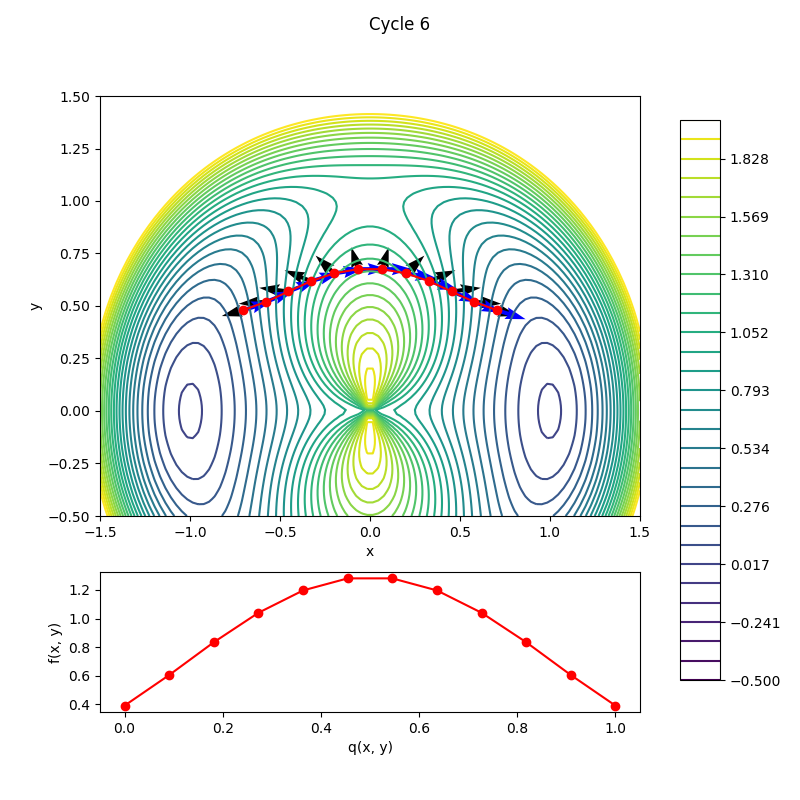

In [6]:
def test_equal_szts():
    kwargs = copy.copy(KWARGS)
    convergence = {
        "max_force_thresh": 0.051,
    }
    kwargs["convergence"] = convergence
    szts_equal = SimpleZTS(get_geoms(), param="equal")
    opt = run_cos_opt(szts_equal, SteepestDescent, **kwargs)

    assert(opt.is_converged)
    assert(opt.cur_cycle == 21)

    return opt
opt = test_equal_szts()
animate(opt)